In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                  'key2' : ['one', 'two', 'one', 'two', 'one'],
                  'data1' : np.random.randn(5),
                  'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.201135,0.579197
1,a,two,1.512447,-1.575208
2,b,one,-0.333244,-0.240358
3,b,two,0.450920,-1.729719
4,a,one,-0.163370,0.980330


In [10]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.049314
b    0.058838
Name: data1, dtype: float64

In [12]:
grouped1 = df[['data1','data2']].groupby(df['key1'])
grouped1.mean()

,data1,data2
key1,,
a,0.049314,-0.005227
b,0.058838,-0.985038


In [15]:
means = df[['data1','data2']].groupby([df['key1'],df['key2']]).mean()

In [16]:
means

data1     data2
key1 key2                    
a    one  -0.682252  0.779763
     two   1.512447 -1.575208
b    one  -0.333244 -0.240358
     two   0.450920 -1.729719

In [17]:
means.unstack()

data1               data2          
key2       one       two       one       two
key1                                        
a    -0.682252  1.512447  0.779763 -1.575208
b    -0.333244  0.450920 -0.240358 -1.729719

# **tips 데이터**

In [18]:
tips = pd.read_csv('C:/Users/admin/Desktop/210603~/210608/데이터/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## **tips 데이터에 tip_pct (tip/total bill) column 추가**

In [24]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [25]:
tips.pivot_table(index = ['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [26]:
grouped = tips.groupby(['day','smoker'])

In [33]:
grouped.agg('mean')  ## grouped.mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

## **agg에 여러 메서드 전달하기**

In [34]:
func = ['mean','median','count'] # 이외 집계에 사용되는 function들 min,mix...

In [36]:
grouped.agg(func)

total_bill                     tip                   size         \
                  mean  median count      mean median count      mean median   
day  smoker                                                                    
Fri  No      18.420000  19.235     4  2.812500  3.125     4  2.250000      2   
     Yes     16.813333  13.420    15  2.714000  2.500    15  2.066667      2   
Sat  No      19.661778  17.820    45  3.102889  2.750    45  2.555556      2   
     Yes     21.276667  20.390    42  2.875476  2.690    42  2.476190      2   
Sun  No      20.506667  18.430    57  3.167895  3.020    57  2.929825      3   
     Yes     24.120000  23.100    19  3.516842  3.500    19  2.578947      2   
Thur No      17.113111  15.950    45  2.673778  2.180    45  2.488889      2   
     Yes     19.190588  16.470    17  3.030000  2.560    17  2.352941      2   

                    tip_pct                  
            count      mean    median count  
day  smoker                                  
Fri  No         4  0.151650  0.149241     4  
     Yes       15  0.174783  0.173913    15  
Sat  No        45  0.158048  0.150152    45  
     Yes       42  0.147906  0.153624    42  
Sun  No        57  0.160113  0.161665    57  
     Yes       19  0.187250  0.138122    19  
Thur No        45  0.160298  0.153492    45  
     Yes       17  0.163863  0.153846    17

## **Q) 시간대별(time), 요일별(day), 파티규모(size), 팁 비율(tip_pct)를 알고 싶다면?**

In [37]:
tips.pivot_table(['tip_pct','size'], index = ['time','day'])

size   tip_pct
time   day                     
Dinner Fri   2.166667  0.158916
       Sat   2.517241  0.153152
       Sun   2.842105  0.166897
       Thur  2.000000  0.159744
Lunch  Fri   2.000000  0.188765
       Thur  2.459016  0.161301

In [38]:
tips.pivot_table(['tip_pct','size'], index = ['time','day'], columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [39]:
tips.pivot_table(['tip','tip_pct'], index = ['time','smoker'], columns = 'day', aggfunc = {'tip' : len, 'tip_pct' : np.sum})

tip                     tip_pct                              
day            Fri   Sat   Sun  Thur       Fri       Sat       Sun      Thur
time   smoker                                                               
Dinner No      3.0  45.0  57.0   1.0  0.418867  7.112145  9.126438  0.159744
       Yes     9.0  42.0  19.0   NaN  1.488126  6.212055  3.557756       NaN
Lunch  No      1.0   NaN   NaN  44.0  0.187735       NaN       NaN  7.053669
       Yes     6.0   NaN   NaN  17.0  1.133620       NaN       NaN  2.785676

## **Cross Table**

In [42]:
pd.crosstab(tips.day, tips.smoker)

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


In [43]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

### **예) 주변 레스토랑들의 매출액, 영업이익, 인건비, 기타경비의 데이터가 있다고 가정.**  
**레스토랑별 아래 4개 변수의 시각화는?**

In [53]:
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D']))

In [54]:
df

,A,B,C,D
one,0.343770,0.200522,0.240397,0.115394
two,0.248423,0.559258,0.331240,0.182481
three,0.753866,0.585118,0.884527,0.071513
four,0.506512,0.372156,0.704395,0.545060
five,0.210192,0.234123,0.156659,0.918169
six,0.895687,0.722735,0.116351,0.850108


In [55]:
df['A']

one      0.343770
two      0.248423
three    0.753866
four     0.506512
five     0.210192
six      0.895687
Name: A, dtype: float64

In [56]:
bar_padding1 = df['A'] + df['B']
bar_padding2 = df['A'] + df['B'] + df['C']

<BarContainer object of 6 artists>

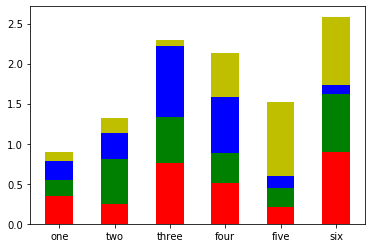

In [57]:
plt.bar(df.index, df['A'], color = 'r', width = 0.5)
plt.bar(df.index, df['B'], bottom = df['A'], color = 'g', width = 0.5)
plt.bar(df.index, df['C'], bottom = bar_padding1, color = 'b', width = 0.5)
plt.bar(df.index, df['D'], bottom = bar_padding2, color = 'y', width = 0.5)

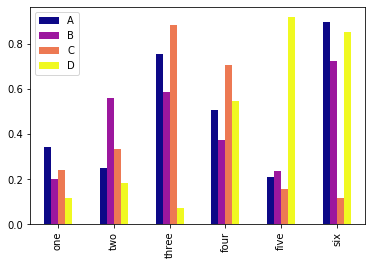

In [60]:
df.plot.bar(cmap = 'plasma')

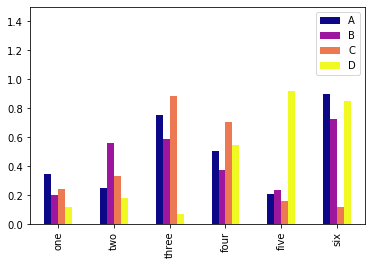

In [61]:
fig = plt.figure()
ax = fig.add_subplot()
df.plot.bar(ax = ax, cmap = 'plasma')
ax.set_ylim(0,1.5)
plt.show()

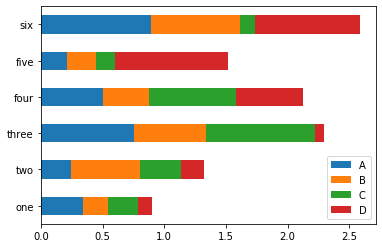

In [62]:
df.plot.barh(stacked = True)